## Argo Test

In this notebook I'm attempting to replicate some of the glider results with Argo data in the region of 30E-40E and 50S-55S.

In [142]:
import scipy
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

In [143]:
ds = argo_loader.region([30,40,-55,-50, 200,1500]).to_xarray()

In [144]:
ds_prof=ds.argo.point2profile()

(array([15.,  7.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  8.]),
 array([  9.5     ,  18.609997,  27.719995,  36.829994,  45.93999 ,
         55.049988,  64.15999 ,  73.26998 ,  82.37998 ,  91.489975,
        100.599976], dtype=float32),
 <BarContainer object of 10 artists>)

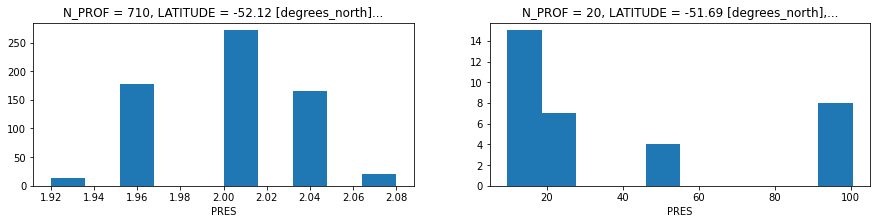

In [145]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
prof_1=ds_prof.PRES.isel(N_PROF=-10).diff('N_LEVELS')
prof_1.plot.hist()

plt.subplot(1,2,2)
prof_2=ds_prof.PRES.isel(N_PROF=1).diff('N_LEVELS')
prof_2.plot.hist()

(array([  0., 416.,   0.,  66.,   0.,   0., 875., 106.,   2.,  16.,   0.,
          2.,  13.]),
 array([ 0.        ,  1.53846154,  3.07692308,  4.61538462,  6.15384615,
         7.69230769,  9.23076923, 10.76923077, 12.30769231, 13.84615385,
        15.38461538, 16.92307692, 18.46153846, 20.        ]),
 <BarContainer object of 13 artists>)

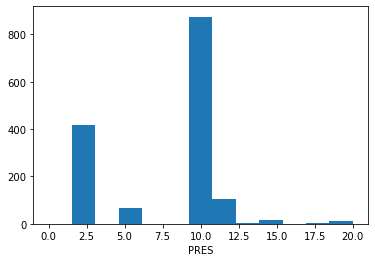

In [147]:
median_dp=ds_prof.PRES.where(ds_prof.PRES<1000).diff('N_LEVELS').median('N_LEVELS')
median_dp.plot.hist(bins=np.linspace(0,20,14))

In [163]:
ind_2m=median_dp.where(median_dp<3.,drop=True).N_PROF
ds_sel=ds_prof.sel(N_PROF=ind_2m)
ds_interp=ds_sel.argo.interp_std_levels(np.arange(200,900,2))
ds_interp=ds_interp.sortby(ds_interp.N_PROF)

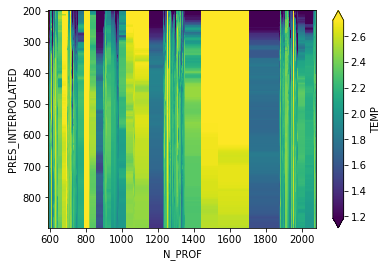

In [169]:
ds_interp.TEMP.plot(y='PRES_INTERPOLATED',robust=True)
plt.gca().invert_yaxis()